# Predicting Osteoporosis Risk

## 1. Load & Export the Dataset for Data Preparation.

In [ ]:
# Import necessary libraries for data preparation
import pandas as pd # For data manipulation and analysis
import numpy as np  # For numerical operations

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
df = pd.read_csv('osteoporosis.csv') # Read the csv file into a pandas DataFrame called 'df'
df                                   # Display the first and last 5 rows of the DataFrame

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


### 1.1. Data Preparation: Check for null values, df info, address missing values and encode categorical features.

In [ ]:
# Check for null values
df.isnull().sum() # Check for missing values in each column and sum them up

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


In [ ]:
df.info() # Summary of df structure and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Fill missing values with the mode, identify categorical columns, apply one-hot encoding, and drop original categorical columns.



In [ ]:
# Fill missing values with the mode
for col in ['Alcohol Consumption', 'Medical Conditions', 'Medications']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the modified DataFrame
df

,Id,Age,Osteoporosis,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Medical Conditions_Rheumatoid Arthritis,Prior Fractures_Yes
0,104866,69,1,False,False,True,True,False,True,True,True,True,True,True,True
1,101999,32,1,False,False,True,True,False,True,True,True,True,False,False,True
2,106567,89,1,False,True,False,False,True,False,False,True,False,False,False,False
3,102316,78,1,False,False,False,False,True,True,False,False,True,True,True,False
4,101944,38,1,True,True,True,False,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,0,False,False,True,False,False,False,False,True,True,True,True,True
1954,106463,23,0,False,True,True,False,True,True,True,False,False,False,False,False
1955,103142,34,0,False,True,False,False,False,True,True,True,True,False,False,False
1956,105187,25,0,True,True,False,False,False,False,True,False,True,True,True,True


# 2. Exploratory Data Analysis (EDA)

### 2.1. EDA for Feature Distributions

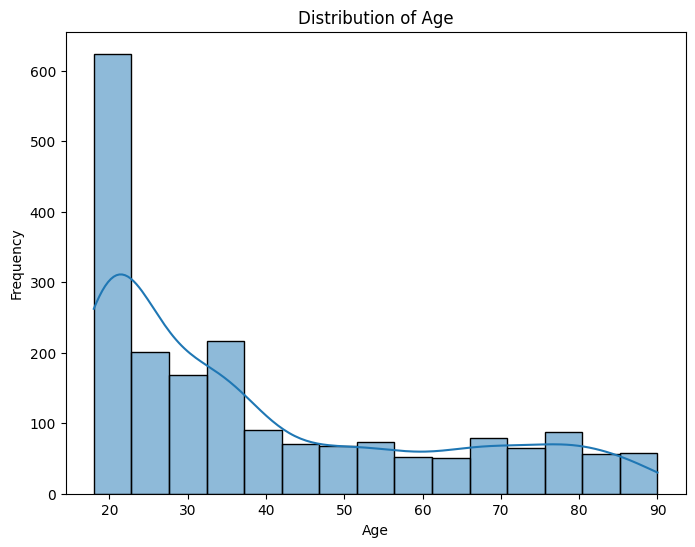

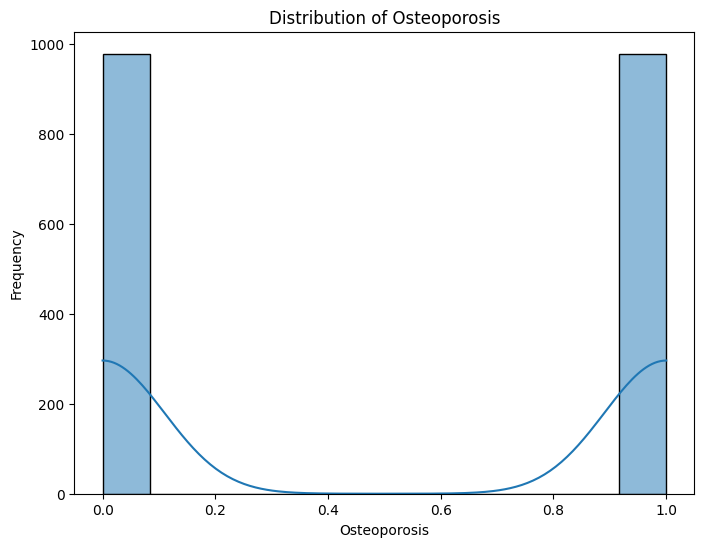

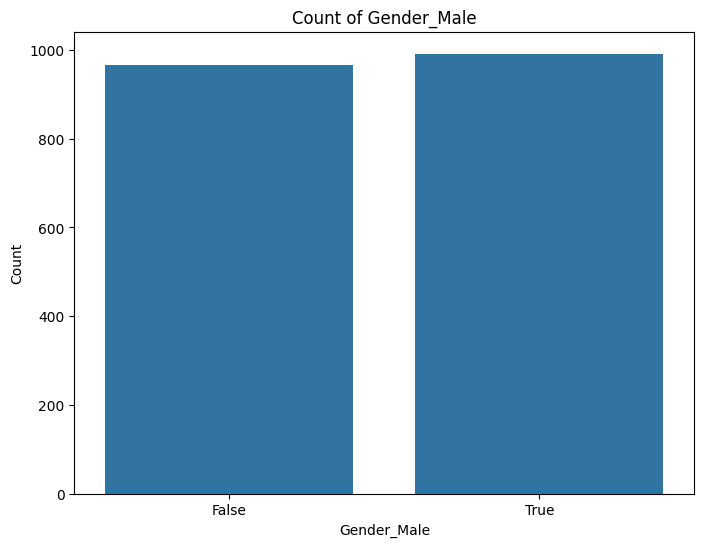

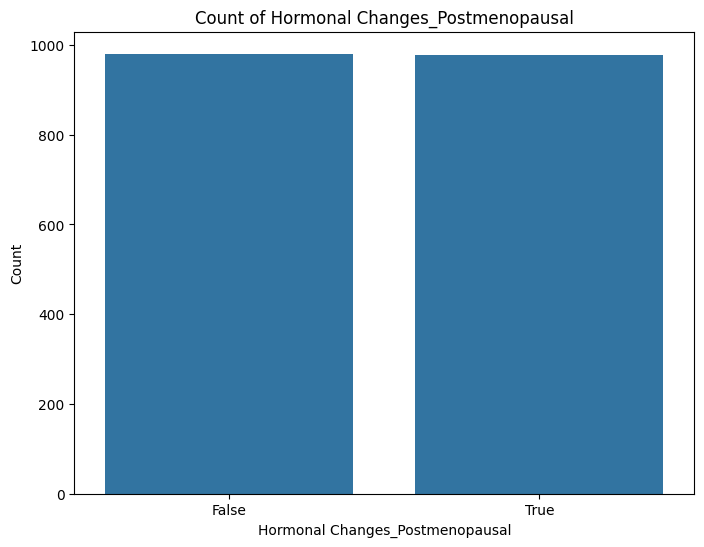

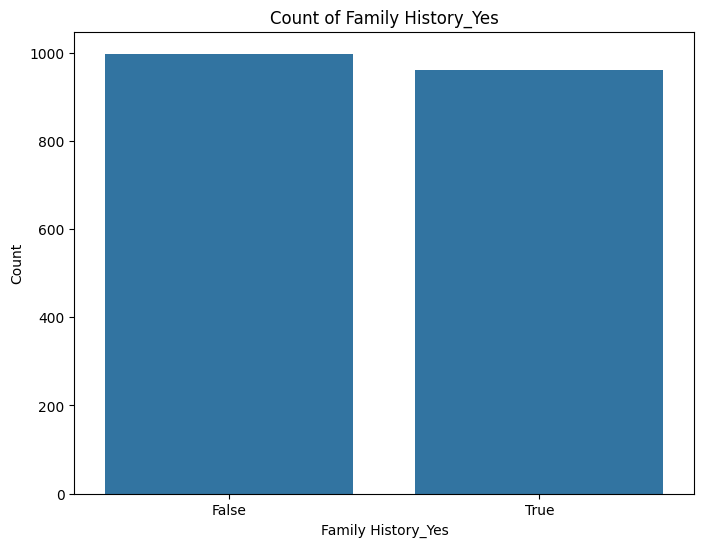

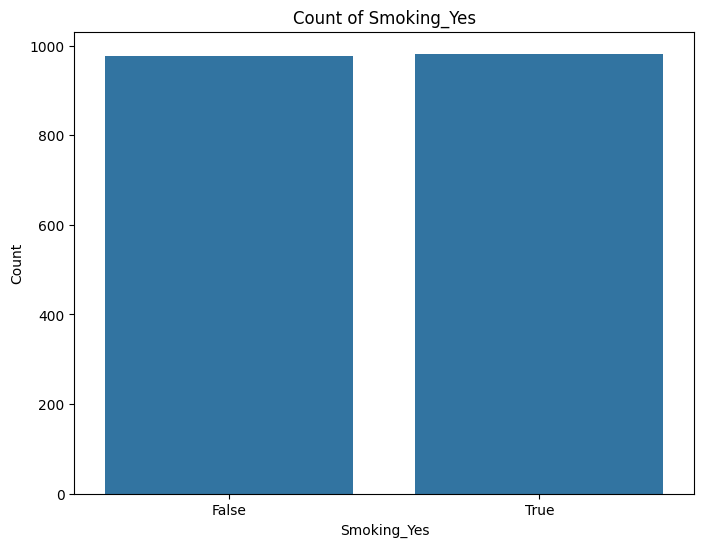

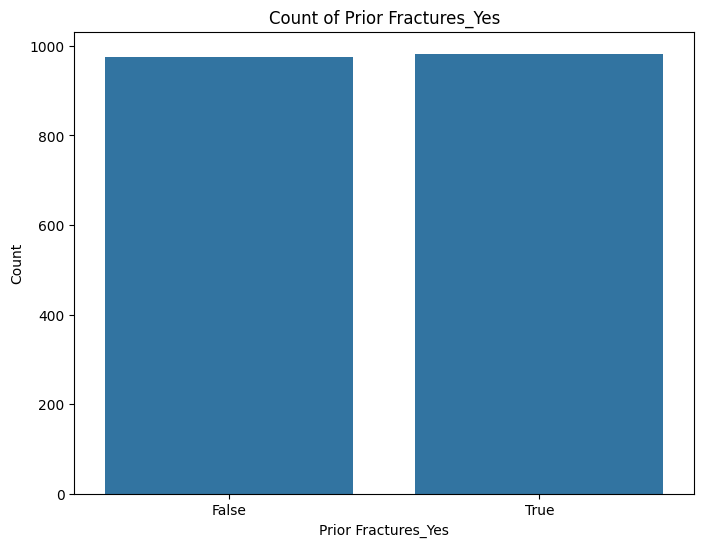

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical features
numerical_cols = ['Age', 'Osteoporosis'] # Add other numerical columns if any
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize counts of categorical features (after one-hot encoding, these are now boolean/binary)
# We can select a few important ones to visualize
categorical_cols_encoded = ['Gender_Male', 'Hormonal Changes_Postmenopausal', 'Family History_Yes', 'Smoking_Yes', 'Prior Fractures_Yes']
for col in categorical_cols_encoded:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 2.2. Relationships with Osteoporosis

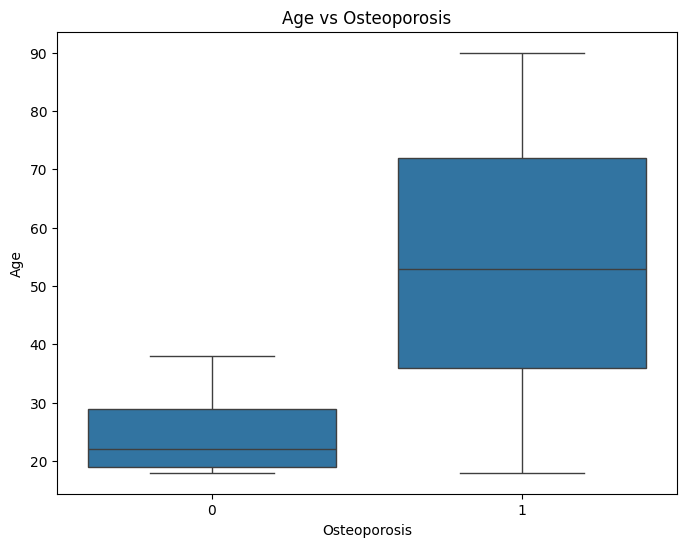

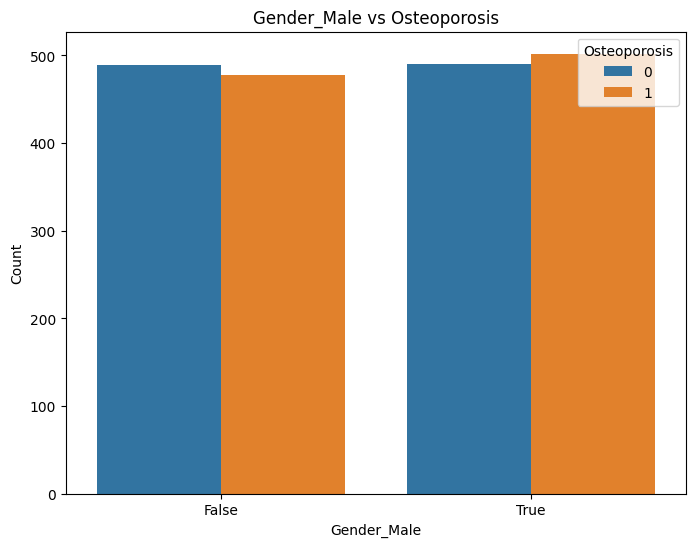

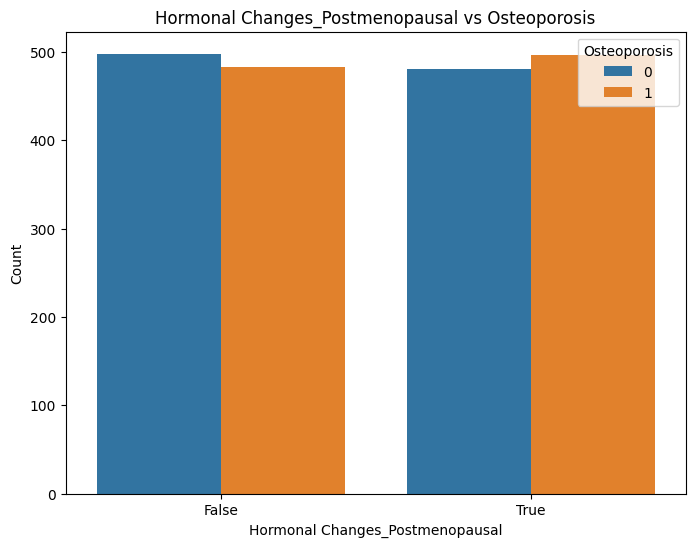

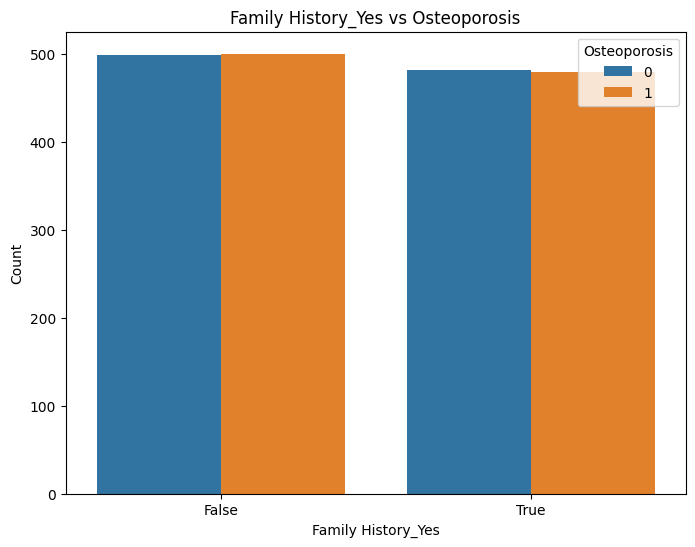

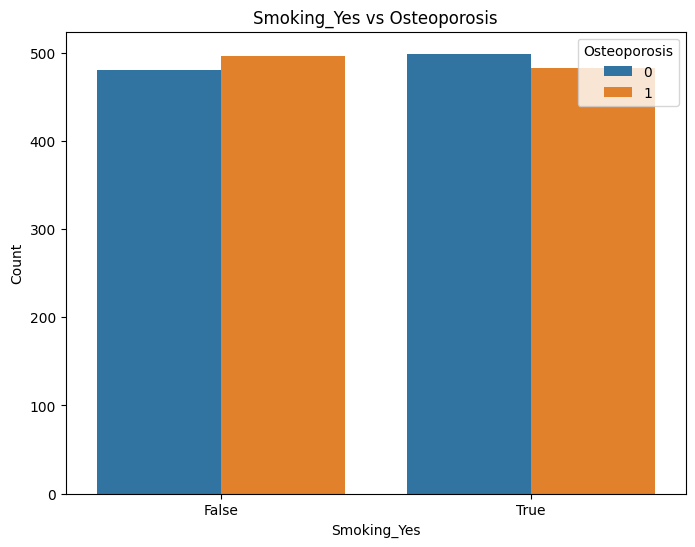

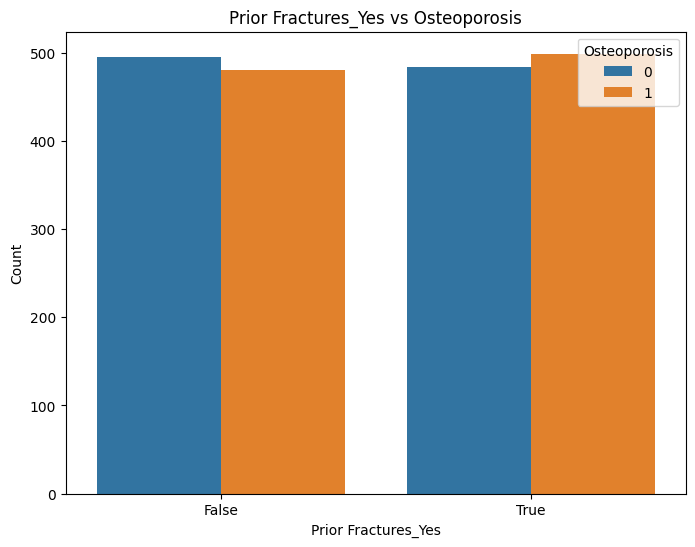

In [ ]:
# Visualize relationships between numerical features and Osteoporosis
numerical_cols = ['Age'] # 'Osteoporosis' is the target, so we exclude it here
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Osteoporosis', y=col)
    plt.title(f'{col} vs Osteoporosis')
    plt.xlabel('Osteoporosis')
    plt.ylabel(col)
    plt.show()

# Visualize relationships between categorical features and Osteoporosis
categorical_cols_encoded = ['Gender_Male', 'Hormonal Changes_Postmenopausal', 'Family History_Yes', 'Smoking_Yes', 'Prior Fractures_Yes']
for col in categorical_cols_encoded:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Osteoporosis')
    plt.title(f'{col} vs Osteoporosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 2.3. Other Relevant Trends and Patterns

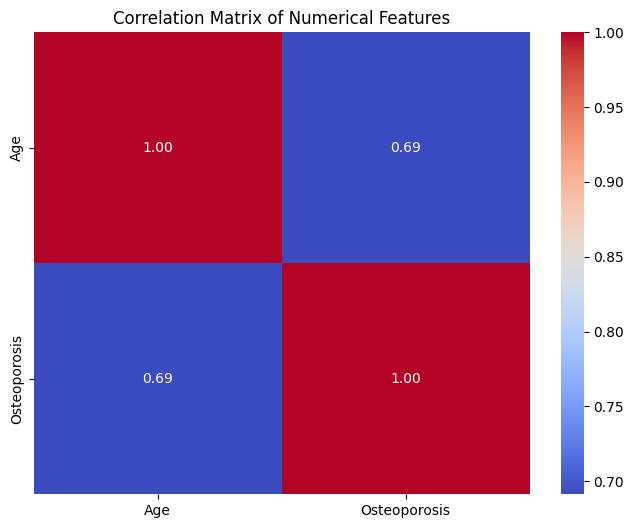

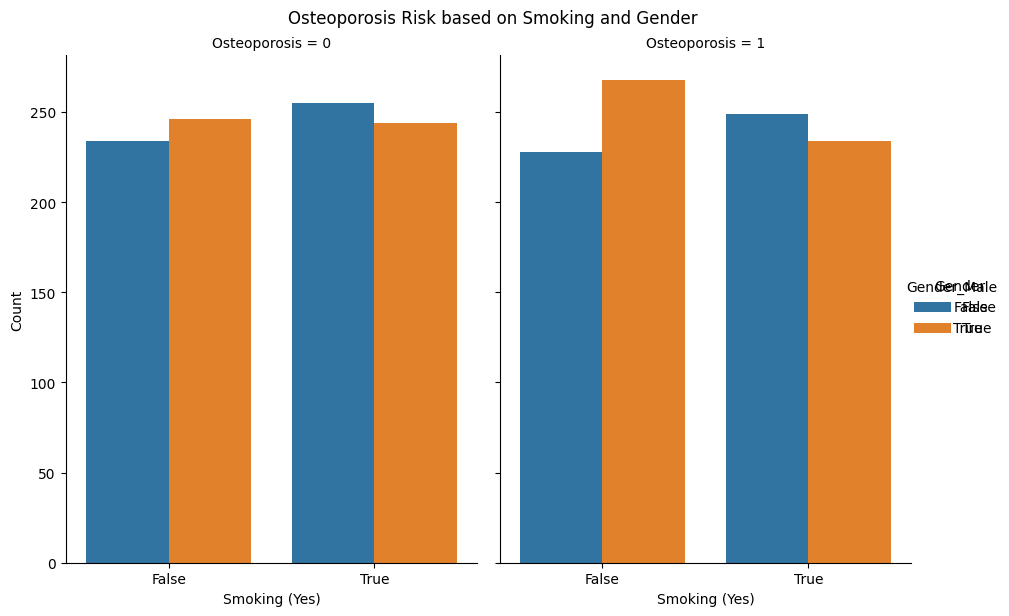

In [ ]:
# Visualize the correlation matrix for numerical features
numerical_cols = ['Age', 'Osteoporosis'] # Add other numerical columns if any
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explore relationships between multiple categorical features and the target
g = sns.catplot(data=df, x='Smoking_Yes', hue='Gender_Male', col='Osteoporosis', kind='count', height=6, aspect=.7)
g.fig.suptitle('Osteoporosis Risk based on Smoking and Gender', y=1.02) # Add title to the figure
g.set_axis_labels('Smoking (Yes)', 'Count') # Set axis labels
g.add_legend(title='Gender') # Add legend
plt.show()

### 2.4. Distribution of Taget Variable

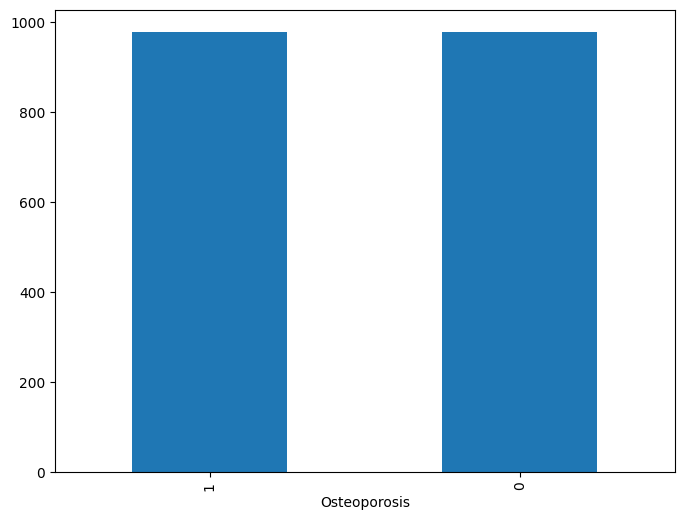

In [ ]:
plt.figure(figsize = (8, 6))
df['Osteoporosis'].value_counts().plot(kind = 'bar')
plt.show()

### 2.5. EDA for Categorical variable plots

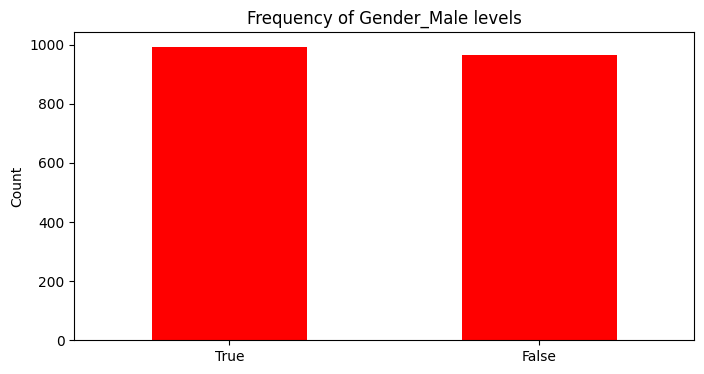

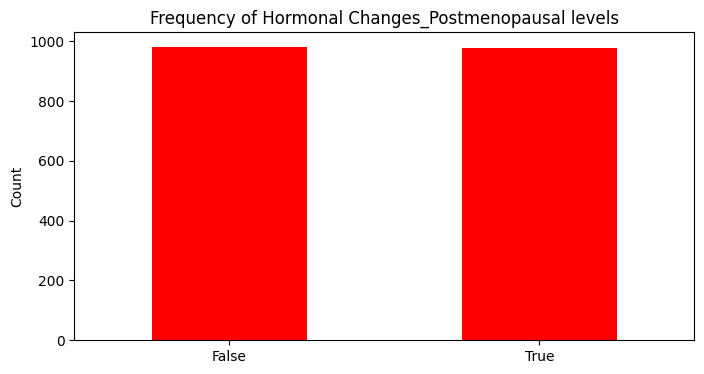

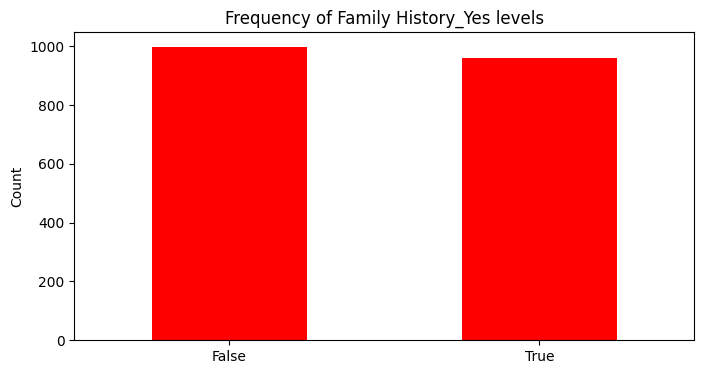

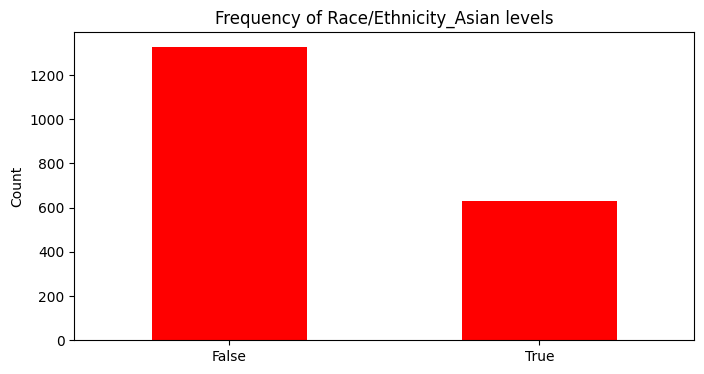

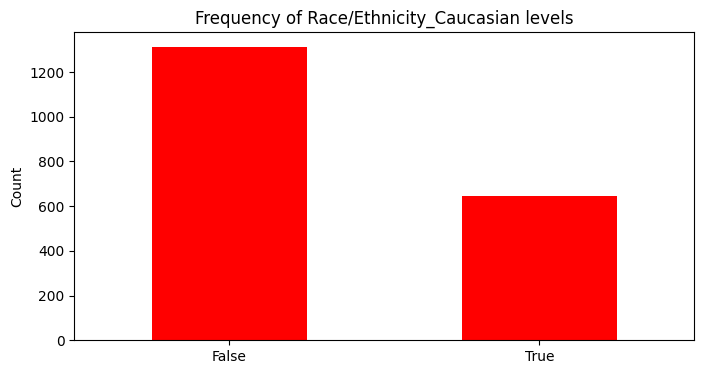

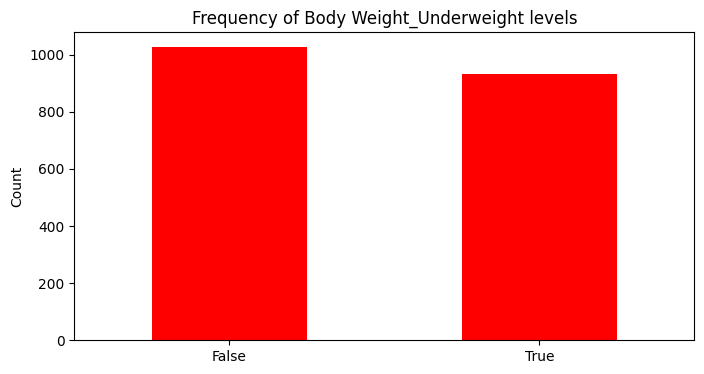

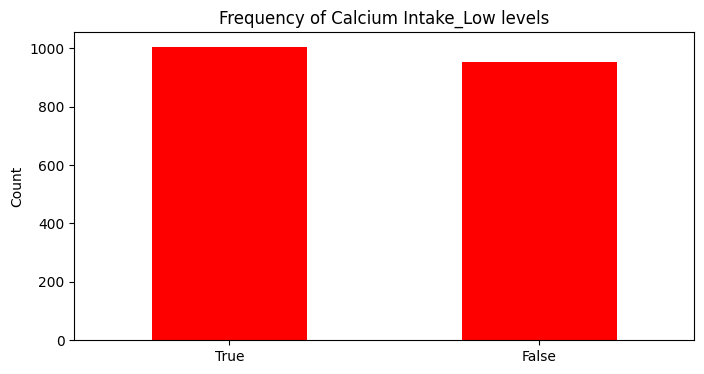

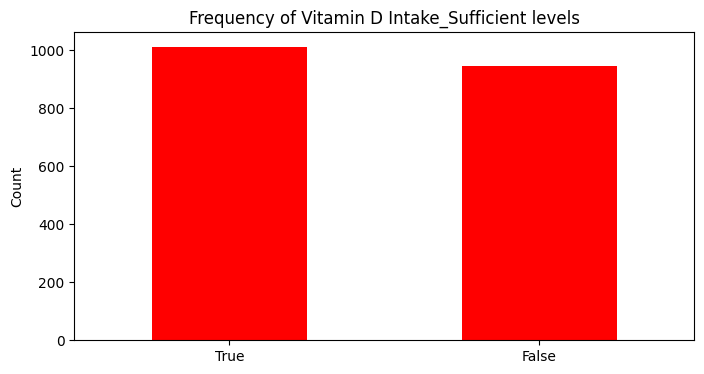

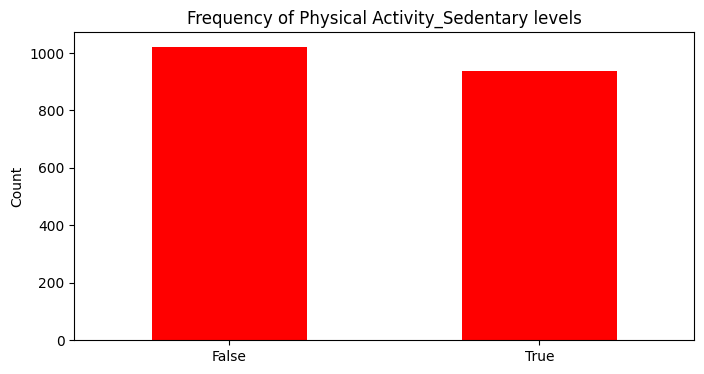

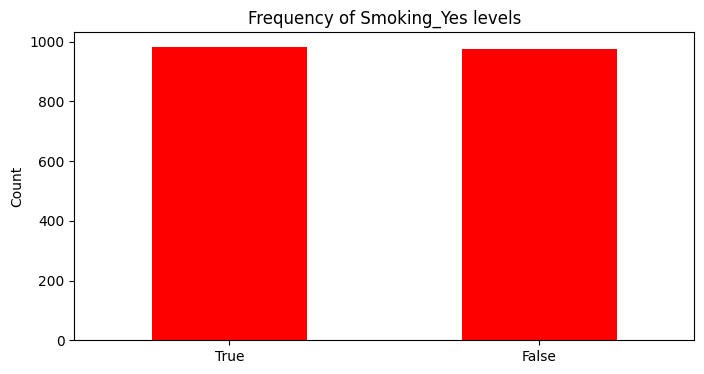

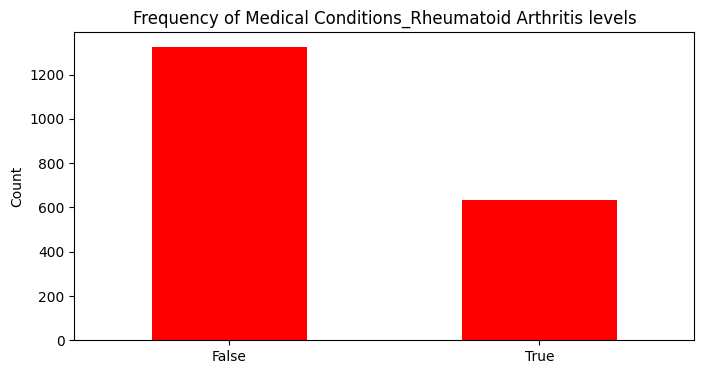

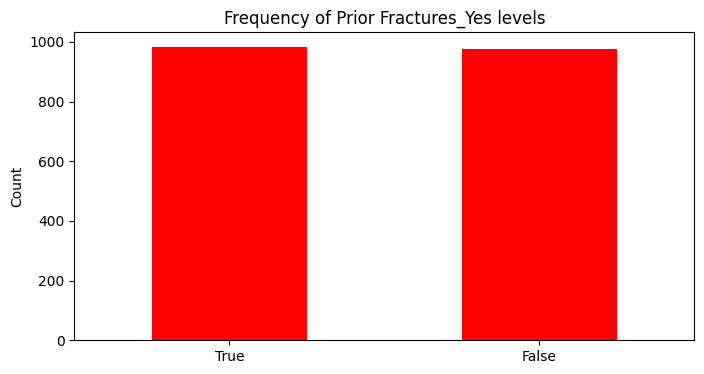

In [ ]:
# Identify the one-hot encoded categorical columns (excluding 'Id' and the target 'Osteoporosis')
categorical_cols_encoded = [col for col in df.columns if df[col].dtype == 'bool' and col != 'Osteoporosis']

# Categorical variable plots
for feature in categorical_cols_encoded:
    plt.figure(figsize=(8, 4)) # figure size for better readability
    df[feature].value_counts().plot(kind='bar', color='red')
    plt.title(f"Frequency of {feature} levels")
    plt.xlabel("")
    plt.ylabel("Count") # Added y-label for clarity
    plt.xticks(rotation=0) # Rotate x-axis labels if needed
    plt.show()

### 2.6. Check for Outliers

In [ ]:
# Check for outliers in numerical features using the IQR method
numerical_cols = ['Age'] # 'Id' is an identifier and 'Osteoporosis' is the target variable, hence using 'Age' numerical column

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers in '{col}':")
    display(outliers)

Outliers in 'Age':


,Id,Age,Osteoporosis,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Medical Conditions_Rheumatoid Arthritis,Prior Fractures_Yes


No outliers in the 'Age' column according to the IQR method.

# 3. Feature Engineering

In [ ]:
# Creating an interaction term between 'Age' and 'Smoking_Yes' as this might be a relevant interaction for predicting osteoporosis risk
df['Age_x_Smoking'] = df['Age'] * df['Smoking_Yes'].astype(int)

# Display the first few 5 to show the new feature
display(df.head())

,Id,Age,Osteoporosis,Gender_Male,Hormonal Changes_Postmenopausal,Family History_Yes,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Body Weight_Underweight,Calcium Intake_Low,Vitamin D Intake_Sufficient,Physical Activity_Sedentary,Smoking_Yes,Medical Conditions_Rheumatoid Arthritis,Prior Fractures_Yes,Age_x_Smoking
0,104866,69,1,False,False,True,True,False,True,True,True,True,True,True,True,69
1,101999,32,1,False,False,True,True,False,True,True,True,True,False,False,True,0
2,106567,89,1,False,True,False,False,True,False,False,True,False,False,False,False,0
3,102316,78,1,False,False,False,False,True,True,False,False,True,True,True,False,78
4,101944,38,1,True,True,True,False,False,False,True,True,False,True,True,True,38


# 4. Data Splitting & Scaling

### 4.1. Split the data into training and testing sets (80-20 split)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
# Drop the 'Id' column as it is not a feature for modeling
X = df.drop(['Id', 'Osteoporosis'], axis=1)
y = df['Osteoporosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (1566, 14)
Testing features shape: (392, 14)
Training target shape: (1566,)
Testing target shape: (392,)


### 4.2. Fit the scaler on the training data only

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 4.3. Transform both the training and testing data using the fitted scaler


In [ ]:
X_test_scaled = scaler.transform(X_test)

print("Training features (scaled) shape:", X_train_scaled.shape)
print("Testing features (scaled) shape:", X_test_scaled.shape)

Training features (scaled) shape: (1566, 14)
Testing features (scaled) shape: (392, 14)


# 5. Data Balancing, Model Selection & Evaluation

Import necessary libraries for data balancing, model evaluation and selection

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 5.1. Apply SMOTE to balance the training data

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_scaled_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Print the shape of the balanced training data
print("Balanced Training features shape:", X_train_scaled_balanced.shape)
print("Balanced Training target shape:", y_train_balanced.shape)

Balanced Training features shape: (1566, 14)
Balanced Training target shape: (1566,)


### 5.2. Initialize and train logistic regression, random forest, decision tree, support vector classifier, gaussian naive bayes, k-nearest neighbors, gradient boosting classifier, xgboost classifier models on the scaled and balanced training data

In [ ]:
# Initialize and train the models on the scaled and balanced training data
logistic_regression_model_balanced = LogisticRegression(random_state=42)
logistic_regression_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

random_forest_model_balanced = RandomForestClassifier(random_state=42)
random_forest_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

decision_tree_model_balanced = DecisionTreeClassifier(random_state=42)
decision_tree_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

svc_model_balanced = SVC(probability=True, random_state=42)
svc_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

gaussian_nb_model_balanced = GaussianNB()
gaussian_nb_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

kneighbors_model_balanced = KNeighborsClassifier()
kneighbors_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

gradient_boosting_model_balanced = GradientBoostingClassifier(random_state=42)
gradient_boosting_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

xgboost_model_balanced = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model_balanced.fit(X_train_scaled_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### 5.3. Make Predictions

In [ ]:
# Make predictions on the scaled testing data using the balanced models
y_pred_lr_balanced = logistic_regression_model_balanced.predict(X_test_scaled)
y_pred_rf_balanced = random_forest_model_balanced.predict(X_test_scaled)
y_pred_dt_balanced = decision_tree_model_balanced.predict(X_test_scaled)
y_pred_svc_balanced = svc_model_balanced.predict(X_test_scaled)
y_pred_nb_balanced = gaussian_nb_model_balanced.predict(X_test_scaled)
y_pred_knn_balanced = kneighbors_model_balanced.predict(X_test_scaled)
y_pred_gb_balanced = gradient_boosting_model_balanced.predict(X_test_scaled)
y_pred_xgb_balanced = xgboost_model_balanced.predict(X_test_scaled)

### 5.4. Evaluate the models

In [ ]:
# Create a dictionary to store evaluation results
evaluation_results_balanced = {}

# List of balanced models and their corresponding predictions
models_balanced = {
    'Logistic Regression': (logistic_regression_model_balanced, y_pred_lr_balanced),
    'Random Forest': (random_forest_model_balanced, y_pred_rf_balanced),
    'Decision Tree': (decision_tree_model_balanced, y_pred_dt_balanced),
    'SVC': (svc_model_balanced, y_pred_svc_balanced),
    'Gaussian NB': (gaussian_nb_model_balanced, y_pred_nb_balanced),
    'KNeighbors': (kneighbors_model_balanced, y_pred_knn_balanced),
    'Gradient Boosting': (gradient_boosting_model_balanced, y_pred_gb_balanced),
    'XGBoost': (xgboost_model_balanced, y_pred_xgb_balanced)
}

# Evaluate each model
for model_name, (model, y_pred) in models_balanced.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # For AUC-ROC, we need probabilities. Handle models that don't have predict_proba directly
    if model_name == 'SVC':
         y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]

    auc_roc = roc_auc_score(y_test, y_prob)

    evaluation_results_balanced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }

# Print the evaluation results
for model_name, metrics in evaluation_results_balanced.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

--- Logistic Regression ---
Accuracy: 0.7985
Precision: 0.8421
Recall: 0.7347
F1 Score: 0.7847
AUC-ROC: 0.8765


--- Random Forest ---
Accuracy: 0.8265
Precision: 0.9211
Recall: 0.7143
F1 Score: 0.8046
AUC-ROC: 0.8884


--- Decision Tree ---
Accuracy: 0.8214
Precision: 0.8351
Recall: 0.8010
F1 Score: 0.8177
AUC-ROC: 0.8209


--- SVC ---
Accuracy: 0.8214
Precision: 0.9257
Recall: 0.6990
F1 Score: 0.7965
AUC-ROC: 0.8775


--- Gaussian NB ---
Accuracy: 0.8138
Precision: 0.8968
Recall: 0.7092
F1 Score: 0.7920
AUC-ROC: 0.8613


--- KNeighbors ---
Accuracy: 0.7449
Precision: 0.7927
Recall: 0.6633
F1 Score: 0.7222
AUC-ROC: 0.7897


--- Gradient Boosting ---
Accuracy: 0.8827
Precision: 0.9934
Recall: 0.7704
F1 Score: 0.8678
AUC-ROC: 0.8894


--- XGBoost ---
Accuracy: 0.8597
Precision: 0.9123
Recall: 0.7959
F1 Score: 0.8501
AUC-ROC: 0.8965




### 5.4. Compare model performance based on AUC-ROC values and print best performing model based on AUC-ROC

In [ ]:
# Create a DataFrame from the evaluation results
evaluation_df_balanced = pd.DataFrame(evaluation_results_balanced).T

# Sort the DataFrame by AUC-ROC for easy comparison
evaluation_df_balanced = evaluation_df_balanced.sort_values(by='AUC-ROC', ascending=False)

# Display the DataFrame
display(evaluation_df_balanced)

# Find the best performing model based on AUC-ROC
best_model_balanced = evaluation_df_balanced['AUC-ROC'].idxmax()
best_auc_roc_balanced = evaluation_df_balanced['AUC-ROC'].max()

print(f"\nBest performing model based on AUC-ROC (Balanced Data): {best_model_balanced}\nAUC-ROC Score: {best_auc_roc_balanced:.4f}")

,Accuracy,Precision,Recall,F1 Score,AUC-ROC
XGBoost,0.859694,0.912281,0.795918,0.850136,0.896501
Gradient Boosting,0.882653,0.993421,0.770408,0.867816,0.889447
Random Forest,0.826531,0.921053,0.714286,0.804598,0.888367
SVC,0.821429,0.925676,0.698980,0.796512,0.877473
Logistic Regression,0.798469,0.842105,0.734694,0.784741,0.876536
Gaussian NB,0.813776,0.896774,0.709184,0.792023,0.861308
Decision Tree,0.821429,0.835106,0.801020,0.817708,0.820921
KNeighbors,0.744898,0.792683,0.663265,0.722222,0.789723



Best performing model based on AUC-ROC (Balanced Data): XGBoost
AUC-ROC Score: 0.8965


# 6. Feature Importance & Feature Selection

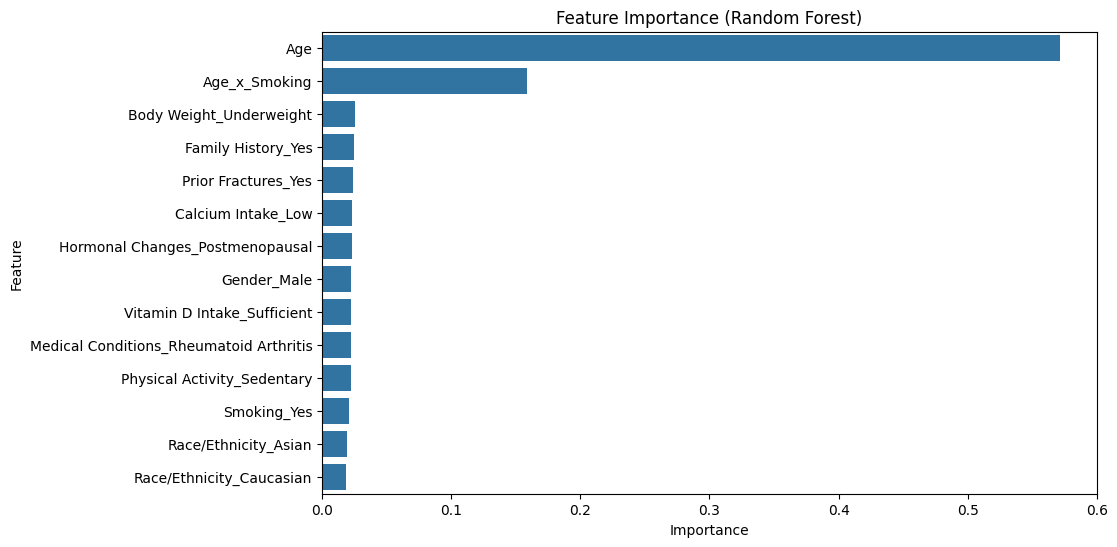

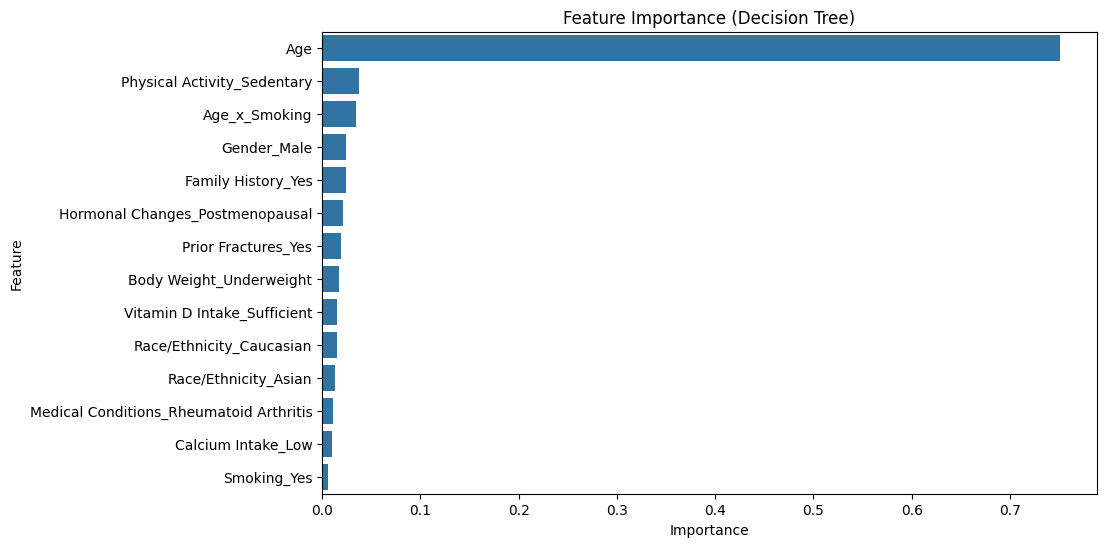

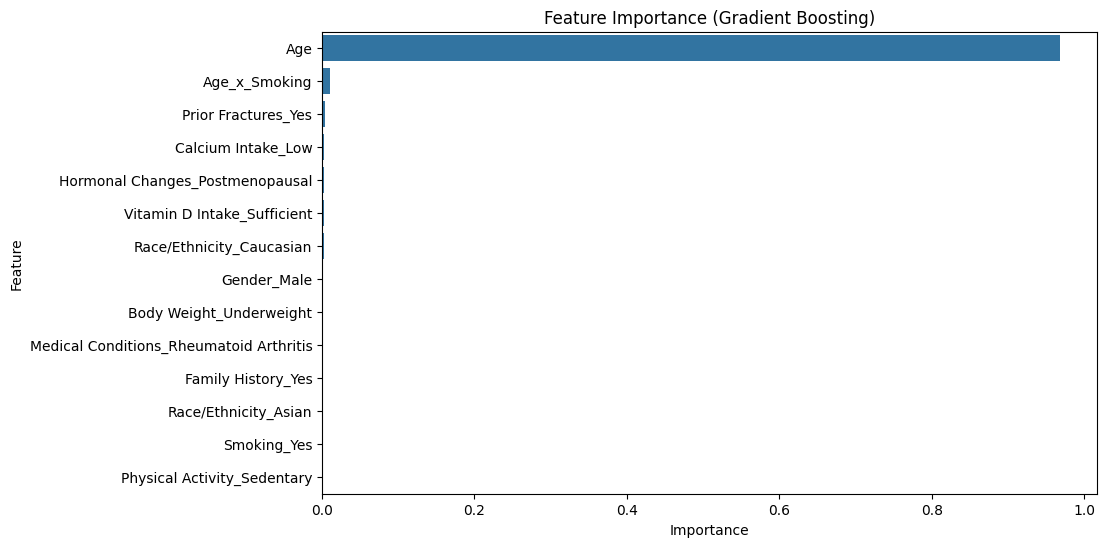

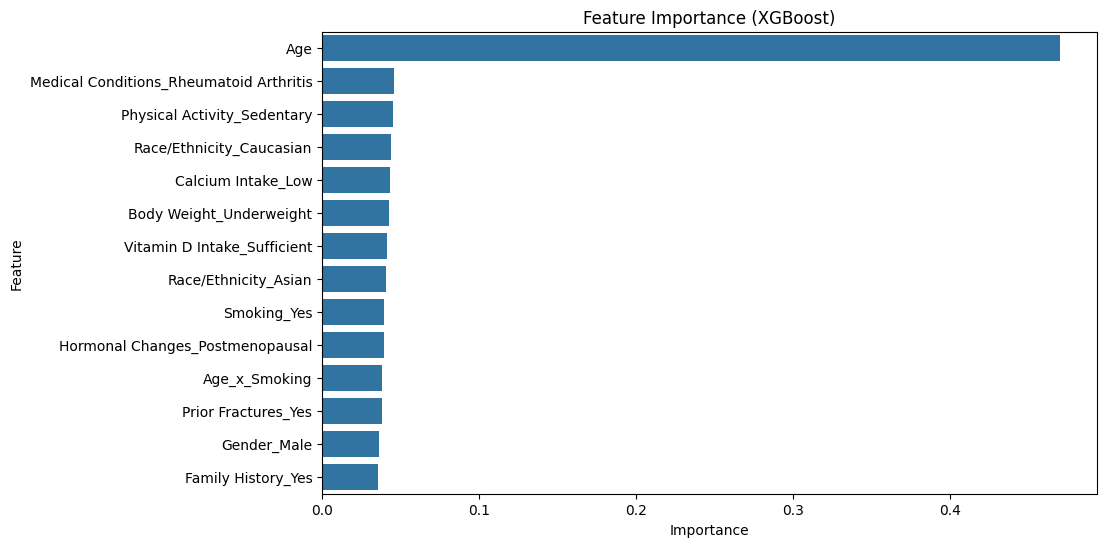

In [ ]:
# Visualize feature importance for tree-based models

# Get feature names from the training data
feature_names = X_train.columns

# Dictionary of trained tree-based models
tree_models = {
    'Random Forest': random_forest_model_balanced,
    'Decision Tree': decision_tree_model_balanced,
    'Gradient Boosting': gradient_boosting_model_balanced,
    'XGBoost': xgboost_model_balanced
}

for model_name, model in tree_models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        # Create a DataFrame for easier visualization
        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance_df)
        plt.title(f'Feature Importance ({model_name})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute.")

Note: Selecting top features didnt yield significant results for RF, DT, GBC, and XGBoost, hence, we decided to include all the features.

# 7. Hyperparameter Tune Best Model (XGBoost)

### 7.1. Hyperparameter tuning using Bayesian Optimization

We implemented GridSearchCV, RandomizedSearchCV, and BayesSearchCV, based on the results GridSearchCV achieved the highest AUC-ROC score (0.9384), closely followed by Bayesian Optimization (0.9381).

Considering potential computational cost on larger datasets or wider search spaces, Bayesian Optimization was selected for its efficiency.

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBClassifier

# Define a wide hyperparameter search space for Bayesian Optimization
search_space = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0, prior='uniform'),
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'),
    'min_child_weight': Integer(1, 7),
    'gamma': Real(0, 0.4, prior='uniform')
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize BayesSearchCV
# n_iter: Number of evaluations of the objective function. Increase for more thorough search.
bayes_search = BayesSearchCV(estimator=xgb_model, search_spaces=search_space, n_iter=50, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit BayesSearchCV to the scaled and balanced training data
bayes_search.fit(X_train_scaled_balanced, y_train_balanced)

# Print the best parameters and best score
print("Best parameters found by Bayesian Optimization:")
print(bayes_search.best_params_)
print("Best AUC-ROC score found by Bayesian Optimization:")
print(bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### 7.2. Refining the Hypertuned Model

Let's try to enhance the model performance by refining the hypertuned XGBoost model.

In [ ]:
# Get the best parameters from the previous Bayesian Optimization run
best_params = bayes_search.best_params_

# Define a refined hyperparameter search space around the best parameters
# We'll create narrower ranges around the best values
refined_search_space = {
    'n_estimators': Integer(max(50, int(best_params['n_estimators'] * 0.8)), int(best_params['n_estimators'] * 1.2)),
    'learning_rate': Real(max(0.005, best_params['learning_rate'] * 0.5), min(0.3, best_params['learning_rate'] * 1.5), prior='log-uniform'),
    'max_depth': Integer(max(2, best_params['max_depth'] - 2), best_params['max_depth'] + 2),
    'subsample': Real(max(0.5, best_params['subsample'] * 0.8), min(1.0, best_params['subsample'] * 1.2), prior='uniform'),
    'colsample_bytree': Real(max(0.5, best_params['colsample_bytree'] * 0.8), min(1.0, best_params['colsample_bytree'] * 1.2), prior='uniform'),
    'min_child_weight': Integer(max(1, best_params['min_child_weight'] - 1), best_params['min_child_weight'] + 1),
    'gamma': Real(max(0.0, best_params['gamma'] * 0.5), min(0.5, best_params['gamma'] * 1.5), prior='uniform')
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize BayesSearchCV with the refined search space
# Increase n_iter for a more thorough search within the refined space if needed
refined_bayes_search = BayesSearchCV(estimator=xgb_model, search_spaces=refined_search_space, n_iter=50, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit BayesSearchCV to the scaled and balanced training data
refined_bayes_search.fit(X_train_scaled_balanced, y_train_balanced)

# Print the best parameters and best score from the refined search
print("Best parameters found by Refined Bayesian Optimization:")
print(refined_bayes_search.best_params_)
print("Best AUC-ROC score found by Refined Bayesian Optimization:")
print(refined_bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### 7.4. Visualize Model Performance (ROC Curve and AUC)

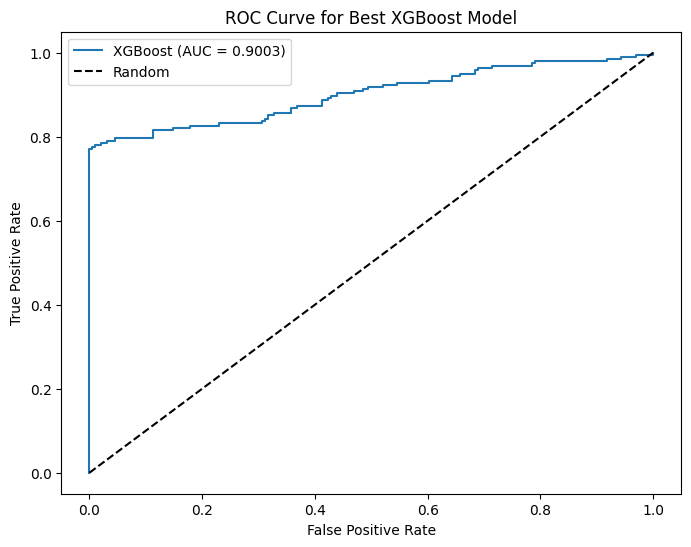

AUC for Best XGBoost Model: 0.9003


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the best performing model from the refined Bayesian Optimization
best_xgb_model = refined_bayes_search.best_estimator_

# Get probabilities for the positive class
y_prob_best_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_xgb)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob_best_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best XGBoost Model')
plt.legend()
plt.show()

print(f"AUC for Best XGBoost Model: {auc:.4f}")

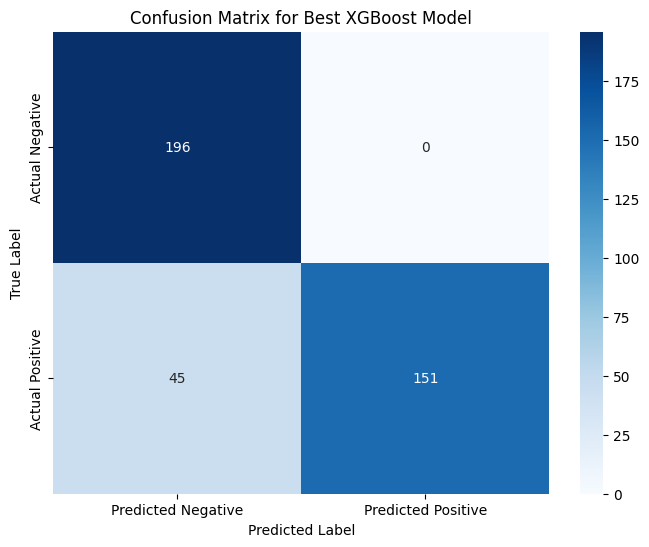

In [ ]:
# Get the best performing model from the refined Bayesian Optimization
best_xgb_model = refined_bayes_search.best_estimator_

# Make predictions on the scaled testing data using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best XGBoost Model')
plt.show()

# 8. Final Model Evaluation

### 8.1. Evaluate the Best Tuned XGBoost Model on the Test Set

In [ ]:
# Get the best performing model from the refined Bayesian Optimization
# Assuming 'refined_bayes_search' is available from previous steps
best_xgb_model = refined_bayes_search.best_estimator_

# Make predictions on the scaled testing data
y_pred_final = best_xgb_model.predict(X_test_scaled)
y_prob_final = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
auc_roc_final = roc_auc_score(y_test, y_prob_final)

# Print the evaluation results
print("--- Final Evaluation Metrics for Best Tuned XGBoost Model ---")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print(f"AUC-ROC: {auc_roc_final:.4f}")

--- Final Evaluation Metrics for Best Tuned XGBoost Model ---
Accuracy: 0.8852
Precision: 1.0000
Recall: 0.7704
F1 Score: 0.8703
AUC-ROC: 0.9003


# 9. Model Deployment

The next steps include saving the trained model, training columns, and scaler, loading the model, and making predictions.

In [ ]:
import joblib
import os

# Define the filename for the saved model and scaler
model_filename = 'best_xgboost_model_for_OR_prediction.pkl'
scaler_filename = 'scaler.pkl'

# Save the best trained XGBoost model to the file
joblib.dump(best_xgb_model, model_filename)

# Save the fitted scaler to a file
joblib.dump(scaler, scaler_filename)


print(f"Trained XGBoost model saved to '{model_filename}'")
print(f"Fitted scaler saved to '{scaler_filename}'")


# Verify the files are saved (optional)
if os.path.exists(model_filename):
    print("Model file successfully created.")
else:
    print("Model file was not created.")

if os.path.exists(scaler_filename):
    print("Scaler file successfully created.")
else:
    print("Scaler file was not created.")

Trained XGBoost model saved to 'best_xgboost_model_for_OR_prediction.pkl'
Fitted scaler saved to 'scaler.pkl'
Model file successfully created.
Scaler file successfully created.


# 10. Loading the Model and Making Predictions

### 10.1. Load the Saved Model

In [ ]:
# Define the filename of the saved model
model_filename = 'best_xgboost_model_for_OR_prediction.pkl'
scaler_filename = 'scaler.pkl'

# Load the trained model from the file
loaded_model = joblib.load(model_filename)

# Load the fitted scaler from the file
loaded_scaler = joblib.load(scaler_filename)


print(f"Trained model loaded from '{model_filename}'")
print(f"Fitted scaler loaded from '{scaler_filename}'")

Trained model loaded from 'best_xgboost_model_for_OR_prediction.pkl'
Fitted scaler loaded from 'scaler.pkl'


### 10.2. Make Predictions with the Loaded Model

In [ ]:
# Assuming you have new data to predict on (e.g., a new DataFrame)
# In a real scenario with new, unscaled data, you would first preprocess it using the loaded_scaler and other transformations (like one-hot encoding) before making predictions.

# For demonstration, we will use a small subset of the "already scaled" test data
sample_new_data = X_test_scaled[:5] # Take the first 5 samples from the scaled test set

# Make predictions using the loaded model
predictions_new_data = loaded_model.predict(sample_new_data)
probabilities_new_data = loaded_model.predict_proba(sample_new_data)[:, 1]

print("Predictions on sample new data:", predictions_new_data)
print("Probabilities of Osteoporosis (positive class) on sample new data:", probabilities_new_data)

Predictions on sample new data: [0 1 1 0 0]
Probabilities of Osteoporosis (positive class) on sample new data: [0.26990396 0.64063644 0.77234834 0.23705322 0.3335325 ]


# 11. Save Training Columns

In [ ]:
# Define the filename for the saved training columns list
training_columns_filename = 'training_columns.pkl'

# Get the list of training columns
training_columns = X_train.columns.tolist()

# Save the training columns list to a pickle file
joblib.dump(training_columns, training_columns_filename)

print(f"Training columns list saved to '{training_columns_filename}'")

Training columns list saved to 'training_columns.pkl'
